In [1]:
# Imports
import sys
sys.path.append('../')
sys.path.append('../../')
from imports import *

print(sys.path)

['x:\\git\\LRZ\\masters-thesis\\prediction\\historical-data', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310', '', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin', '../', '../../']


In [3]:
df_historical = pd.read_csv("20240731-SHELLY_API_SERVERROOM_POWER.csv", sep=";")
df            = pd.read_csv("20240807-SHELLY_API_SERVERROOM_POWER.csv", sep=";")

time = df.time.values
Real = df[df.columns[1]]
Predicted = df_historical[df_historical.columns[1]]
Delta = Real - Predicted

combined_df = pd.DataFrame({"time":time,
                            "Real":Real,
                            "Predicted":Predicted,
                            "Delta":Delta})
combined_df.set_index("time", inplace=True)

combined_df.to_csv("SHELLY_API_SERVERROOM_POWER-combined-old-values-prediction.csv", sep=";")

<AxesSubplot: xlabel='time'>

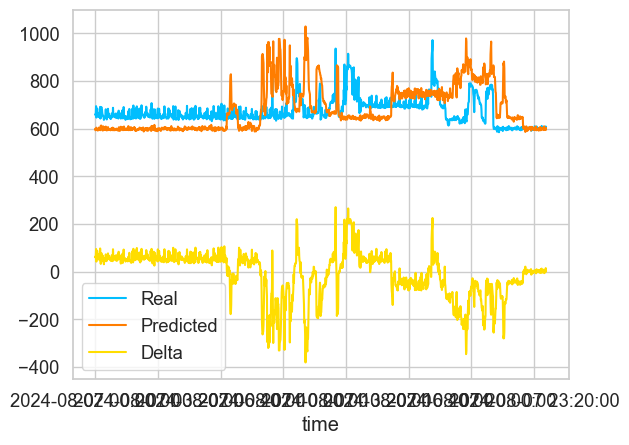

In [4]:
combined_df.plot()

In [5]:
rmse = calc_rmse(Real, Predicted)
rmse

97.61813607362097

In [9]:
p_max = max(Real)
p_max

e_r = rmse / p_max * 100
e_r

10.05513791684137